#### Load Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load data file

In [2]:
all_class_df = pd.read_csv('../data/all_type_class.csv')
beer_class_df = all_class_df[all_class_df['type']=='beer']
wine_class_df = all_class_df[all_class_df['type']=='wine']

In [3]:
wine_class_df['characteristic'].value_counts()

characteristic
taste         37
character     10
categories     4
Name: count, dtype: int64

#### Visualization

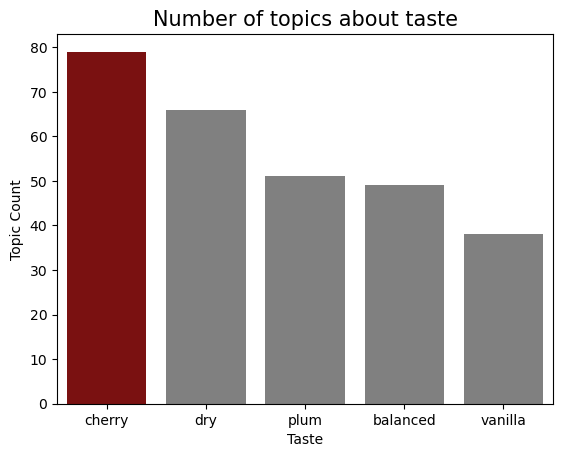

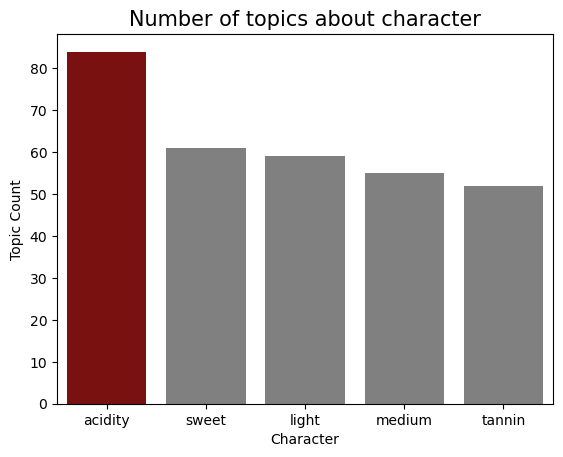

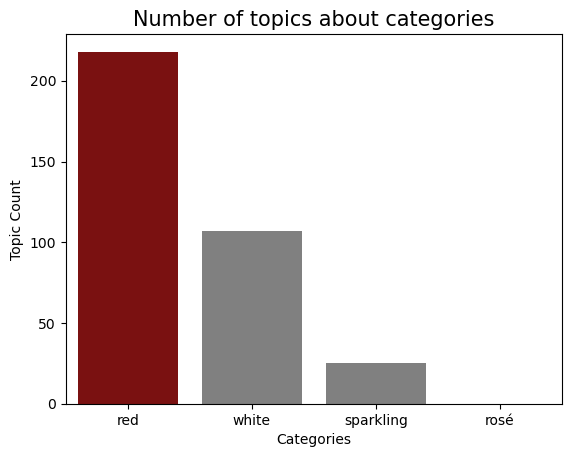

In [4]:
def plot_graph(type, x, xl, yl, colors):
    if type == 'wine':
        df = wine_class_df
    else:
        df = beer_class_df
    ax = sns.barplot(y='topic_count', x='word', data=df[df['characteristic']==x][:5], palette=colors, hue='word')
    ax.set_title('Number of topics about '+x, fontsize=15)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.savefig(f'../figures/{type}_topic_count_{x}.png');
    plt.show();

# wine
colors = ['#8B0000', 'gray', 'gray', 'gray', 'gray']
plot_graph('wine', 'taste', 'Taste', 'Topic Count', colors)
plot_graph('wine', 'character', 'Character', 'Topic Count', colors)
plot_graph('wine', 'categories', 'Categories', 'Topic Count', colors[:4])

In [5]:
beer_class_df['characteristic'].value_counts()

characteristic
taste           3
mouthfeel       3
character       3
appearance      3
raw material    2
categories      2
Name: count, dtype: int64

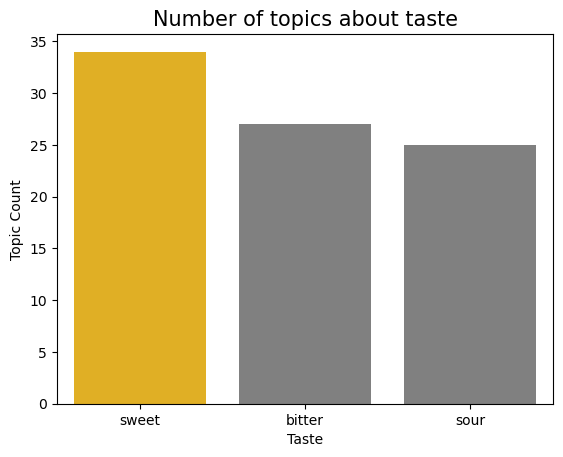

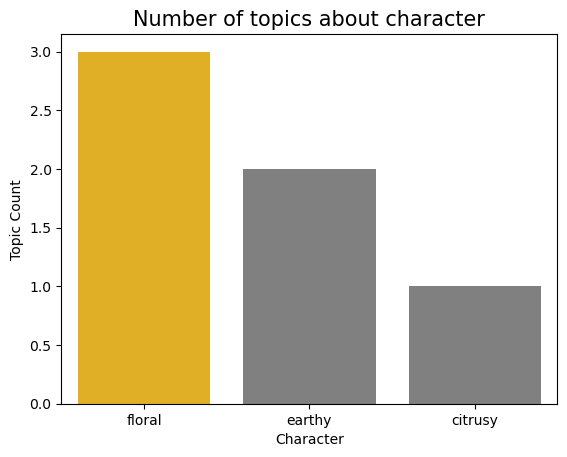

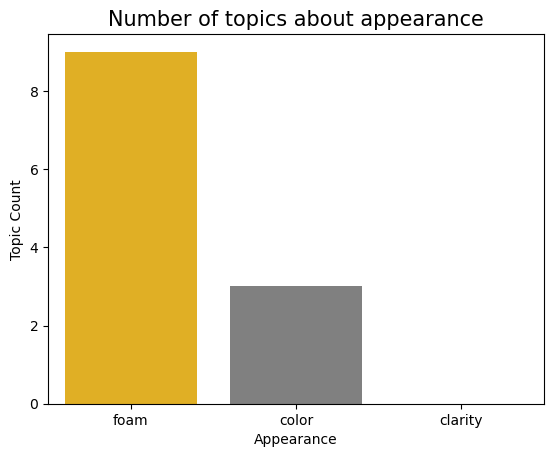

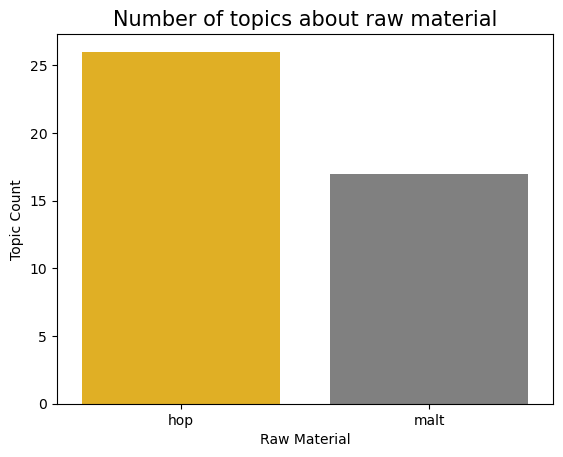

C:\Users\uttha\AppData\Local\Temp\ipykernel_32084\3121296457.py:6: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(y='topic_count', x='word', data=df[df['characteristic']==x][:5], palette=colors, hue='word')


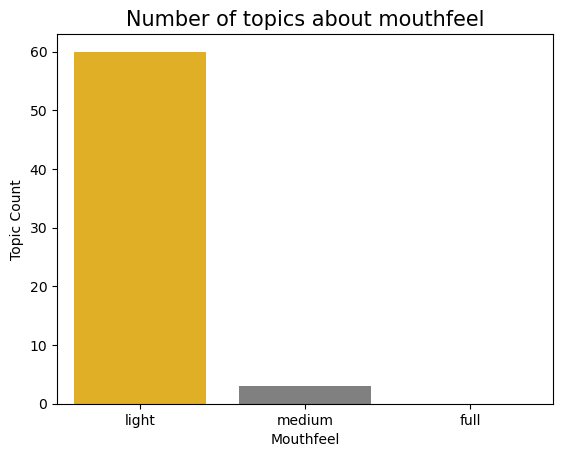

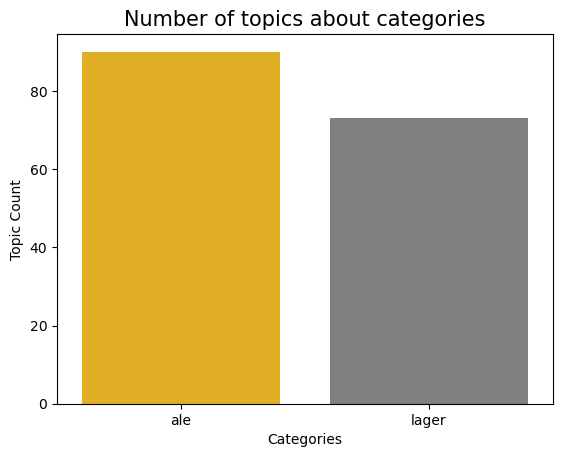

In [6]:
# bear
colors = ['#FFBE06', 'gray', 'gray', 'gray', 'gray']
plot_graph('beer', 'taste', 'Taste', 'Topic Count', colors[:3])
plot_graph('beer', 'character', 'Character', 'Topic Count', colors[:3])
plot_graph('beer', 'appearance', 'Appearance', 'Topic Count', colors[:3])
plot_graph('beer', 'raw material', 'Raw Material', 'Topic Count', colors[:2])
plot_graph('beer', 'mouthfeel', 'Mouthfeel', 'Topic Count', colors[:2])
plot_graph('beer', 'categories', 'Categories', 'Topic Count', colors[:2])